# Gráfico de dispersión (Scatter plot)
La correlación va de -1 a 1, donde:
- 1 indica una correlación positiva perfecta
- -1 indica una correlación negativa perfecta
- 0 indica ninguna correlación

En este Notebook encontraremos las dos materias que tienen mayor correlación en valor absoluto,exceptuando el caso de correlación perfecta que ya sabemos que se da entre 'Astronomy' y 'Defense Against the Dark Arts'.  
Las siguientes dos características con mayor correlación absoluta nos indicarán qué dos características son más similares en términos de sus patrones de puntuación dentro de las asignaturas.

Se mostrarán las dos materias que son más similares, su coeficiente de correlación y se genera el gráfico de dispersión que lo visualiza.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Leer el Dataset

In [2]:
# Establecemos la ruta y leemos el archivo convirtiéndolo en un DataFrame
file_train = '../datasets/dataset_train.csv'
df_train = pd.read_csv(file_train, index_col=0)

### Eliminar las filas con datos incompletos

In [3]:
# El gráfico Scatter Plot requiere que todas las filas tengan datos completos en las dos características analizadas
df_train = df_train.dropna()

### Asignaturas a estudiar

In [4]:
# Get list of course columns (excluding non-course columns)
courses = df_train.select_dtypes(include=['float64']).columns
courses

Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

### Eliminación de 'Astronomy'

In [5]:
import json
import sys
sys.path.append('..')

# Leer el archivo JSON
with open('../output/colum_to_drop.json', 'r') as file:
    data = json.load(file)
    
# Obtener la columna a eliminar
column_to_drop = data['column_to_drop']

# Eliminar la columna del Index
courses = courses.drop(column_to_drop)
courses

Index(['Arithmancy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

## Calcula la matriz de correlación entre todas las materias

In [6]:
# Calculate correlation matrix
correlation_matrix = df_train[courses].corr()
#print('correlation_matrix:', correlation_matrix)
# Find the two most correlated features
# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
#print('nupper_tri:', upper_tri)

### Encontrar las dos materias que tienen la correlación más alta

In [7]:
# Find the two most correlated features (in absolute value)
upper_tri_abs = np.abs(upper_tri)
max_corr_abs = upper_tri_abs.max().max()
feature1, feature2 = np.where(upper_tri_abs == max_corr_abs)
feature1, feature2 = courses[feature1[0]], courses[feature2[0]]

# Retrieve the original correlation value
max_corr = upper_tri.loc[feature1, feature2]
print(f"Max. abs. correlation: {max_corr:.3f}")
print(f"Functions with maximum absolute correlation: '{feature1}' and '{feature2}'.")

Max. abs. correlation: -0.897
Functions with maximum absolute correlation: 'History of Magic' and 'Flying'.


## Creación de la figura
- Crea un scatter plot de estas dos materias
- Añade una línea de tendencia
- Muestra el coeficiente de correlación
- Guarda el resultado en `scatter_plot.png`

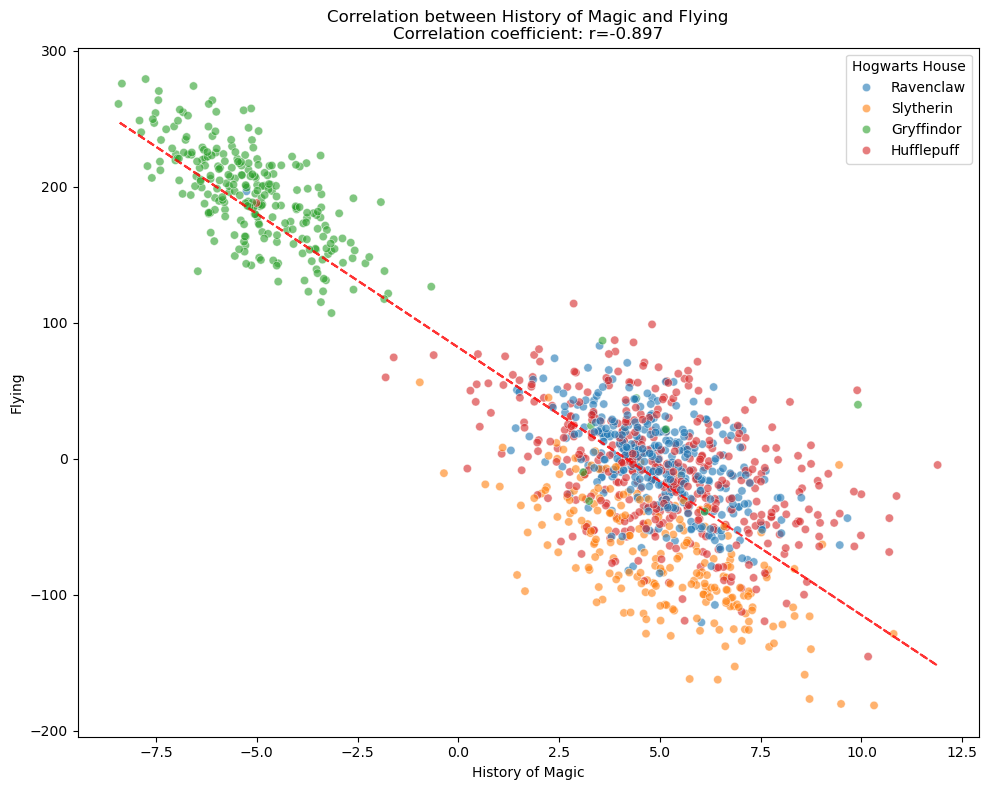


The scratter_plot.png graph has been saved in the 'output' folder.


In [9]:
# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x=feature1, y=feature2, hue='Hogwarts House', alpha=0.6)

# Add correlation line
z = np.polyfit(df_train[feature1], df_train[feature2], 1)
p = np.poly1d(z)
plt.plot(df_train[feature1], p(df_train[feature1]), "r--", alpha=0.8)

# Add correlation coefficient to title
plt.title(f'Correlation between {feature1} and {feature2}\nCorrelation coefficient: r={max_corr:.3f}')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Adjust layout and save
plt.tight_layout()
plt.savefig('../output/scatter_plot.png')
plt.show()
plt.close()

print("\nThe scratter_plot.png graph has been saved in the 'output' folder.")

## Question: What are the two features that are similar?

In [10]:
print("\nQuestion:\nWhat are the two features that are similar?\n")

# Print the correlation value
print(f"The most similar features are {feature1} and {feature2}")
print(f"Their correlation coefficient is: {max_corr:.3f}")


Question:
What are the two features that are similar?

The most similar features are History of Magic and Flying
Their correlation coefficient is: -0.897


### Nota: en un caso de correlación perfecta todos los puntos caen en la recta
Hemos eliminado la feture 'Astronomy' pero si la hubiéramos dejado habríamos obtenido una correlación perfecta inversa (r=-1) con 'Defense Against the Dark Arts'.  
En ese caso, la recta sería decreciente, por ser r negativo y observaríamos que todos los valores de la nube de puntos caen justo sobre la recta de regresión.  
Esto no aportaría mucha información, por este motivo hemos eliminado 'Astronomy' al crear la matriz de correlaciones.

Text(0, 0.5, 'Defense Against the Dark Arts')

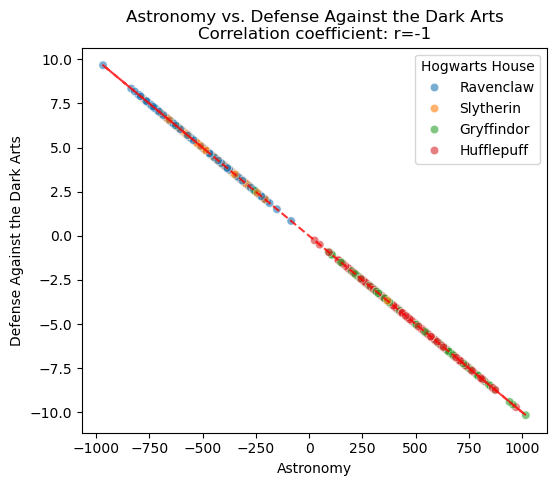

In [11]:
# Create scatter plot
feature1 = 'Astronomy'
feature2 = 'Defense Against the Dark Arts'
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_train, x=feature1, y=feature2, hue='Hogwarts House', alpha=0.6)

# Add correlation line
z = np.polyfit(df_train[feature1], df_train[feature2], 1)
p = np.poly1d(z)
plt.plot(df_train[feature1], p(df_train[feature1]), "r--", alpha=0.8)

# Add correlation coefficient to title
plt.title(f'{feature1} vs. {feature2}\nCorrelation coefficient: r=-1')
plt.xlabel(feature1)
plt.ylabel(feature2)